In [1]:
import os
os.chdir('/mnt/c/projects/audio-classification')

In [2]:
import numpy as np
from src.format_data import MelspectrogramInput

In [3]:
audio = MelspectrogramInput('train_curated')

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, random_state=42, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(audio.data, audio.target, random_state=42)

In [7]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_estimator_)

/home/mari/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
CPU times: user 28min 30s, sys: 3min, total: 31min 30s
Wall time: 13min 40s
Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC(C=5, class_weight='balanced', gamma=0.005))])


In [8]:
model = grid.best_estimator_
yfit = model.predict(Xtest)


Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

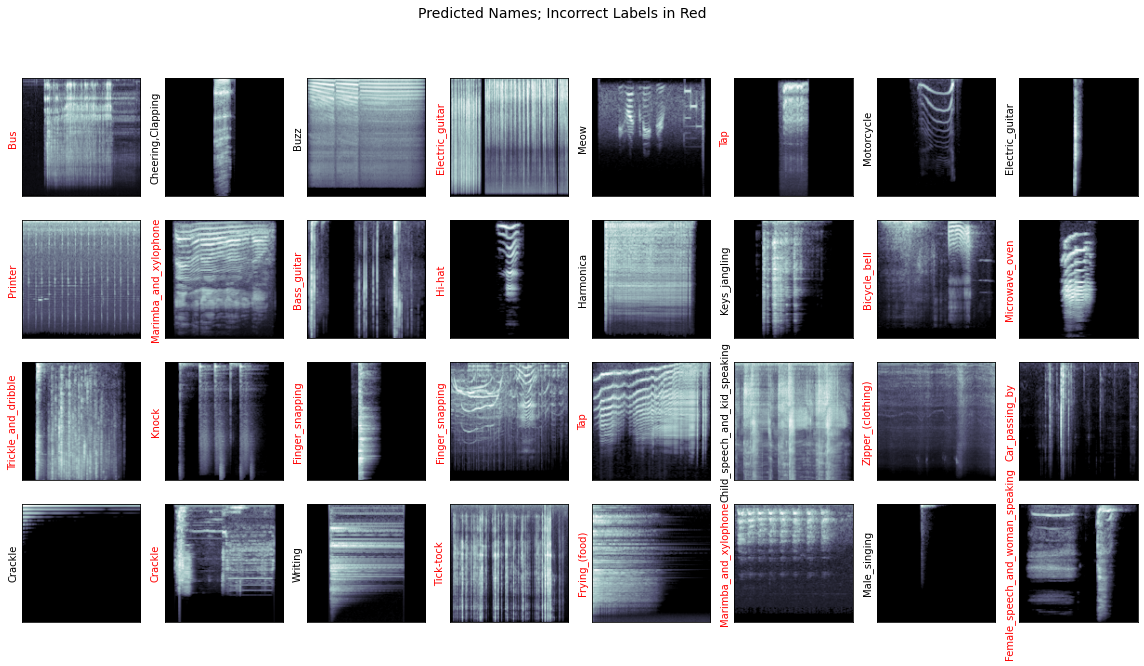

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots( 4, 8, figsize=(20,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(128, 128), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(audio.target_names[int(yfit[i])].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit))

              precision    recall  f1-score   support

         0.0       0.44      0.40      0.42        10
         1.0       0.88      0.39      0.54        18
         3.0       1.00      0.95      0.97        20
         4.0       0.00      0.00      0.00         3
         6.0       0.00      0.00      0.00         2
         7.0       1.00      1.00      1.00         1
         8.0       0.50      0.56      0.53         9
        11.0       0.00      0.00      0.00         1
        13.0       0.00      0.00      0.00         2
        14.0       0.71      0.75      0.73        16
        15.0       0.00      0.00      0.00         2
        16.0       0.00      0.00      0.00         1
        19.0       0.67      0.76      0.71        21
        20.0       0.82      0.82      0.82        17
        21.0       0.11      0.17      0.13        12
        22.0       0.00      0.00      0.00         1
        25.0       0.00      0.00      0.00         0
        27.0       0.26    